In [1]:
import nibabel as nib
import os
import sys
import numpy as np
import torch
from torchvision import transforms

basedir = './NFBS_Dataset'
datalist = os.listdir(basedir)
#datalist

In [2]:
len(datalist)

125

In [2]:
import nibabel as nib
data = nib.load('/home/kdh/code/BME_Capstone1/NFBS_Dataset/A00028185/sub-A00028185_ses-NFB3_T1w.nii.gz').get_fdata()
data.shape

(256, 256, 192)

In [3]:
import matplotlib.font_manager as fm
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[]

Text(0.5, 1.0, 'Sagittal (256x256)')

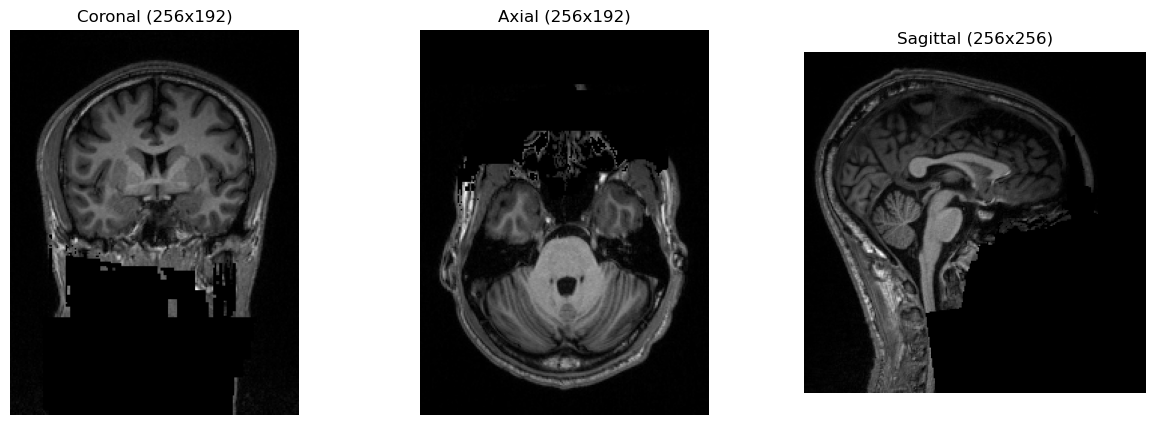

In [4]:
import matplotlib.pyplot as plt

plt.figure(dpi=100, figsize=(15, 5))
#plt.rcParams['font.family'] = 'Apple Gothic'

plt.subplot(1, 3, 1)
plt.imshow(data[data.shape[0]//2, :, :], cmap='gray')
plt.axis('off')
plt.title('Coronal (256x192)')

plt.subplot(1, 3, 2)
plt.imshow(data[:, data.shape[1]//2, :], cmap='gray')
plt.axis('off')
plt.title('Axial (256x192)')

plt.subplot(1, 3, 3)
plt.imshow(np.rot90(data[:, :, data.shape[2]//2], 3), cmap='gray')
plt.axis('off')
plt.title('Sagittal (256x256)')

In [6]:
196/ 14

14.0

(-0.5, 195.5, 265.5, -0.5)

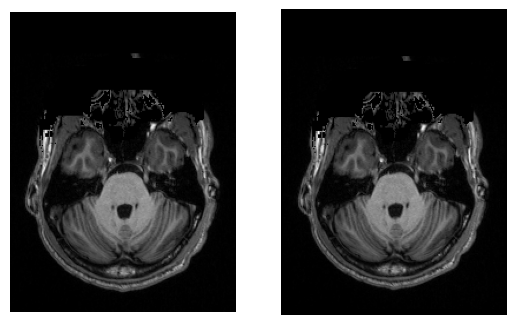

In [12]:
axial = data[:, data.shape[1]//2, :]

plt.subplot(1, 2, 1)
plt.imshow(axial, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
pad_height = 266 - axial.shape[0] 
pad_width = 196 - axial.shape[1] 

axial_padded = np.pad(axial, ((pad_height // 2, pad_height - pad_height // 2), 
                              (pad_width // 2, pad_width - pad_width // 2)), 
                      mode='constant', constant_values=0)
plt.imshow(axial_padded, cmap='gray')
plt.axis('off')

In [ ]:
def repeat_channel(t):
    t = torch.concat([t, t, t])
    return t

def normalize_range(t):
    t = (t - np.min(t)) / np.max(t)
    return t

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(224),
    #transforms.Normalize(0.5, 0.5),
    repeat_channel,
    normalize_range,
])
t = np.zeros((224, 224))
transform(t).shape

TypeError: min() received an invalid combination of arguments - got (out=NoneType, axis=NoneType, ), but expected one of:
 * ()
 * (Tensor other)
 * (int dim, bool keepdim = False)
      didn't match because some of the keywords were incorrect: out, axis
 * (name dim, bool keepdim = False)
      didn't match because some of the keywords were incorrect: out, axis


In [43]:
from utils import get_data

rdata = np.random.choice(datalist)
original, mask, brain = get_data(rdata, basedir=basedir)

In [50]:
np.min(original)

0.0

In [44]:
original.shape

(256, 256, 192)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..680.1814477468843].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..883.0277777777777].


(-0.5, 223.5, 223.5, -0.5)

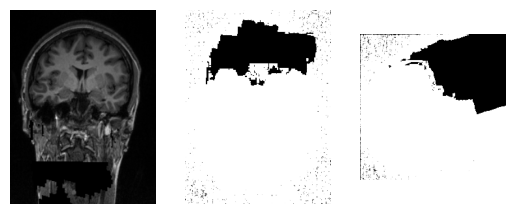

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(1, 3, 1)
sl = original.shape[0] // 2
tmp = transform(original[sl, :, :])
plt.imshow(tmp.permute(1,2,0), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
sl = original.shape[1] // 2
tmp = transform(original[:, sl, :])
plt.imshow(tmp.permute(1,2,0), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
sl = original.shape[2] // 2
tmp = transform(original[:, :, sl])
plt.imshow(tmp.permute(1,2,0), cmap='gray')
plt.axis('off')

In [ ]:
import plotly.graph_objects as go

# 3D 볼륨 렌더링
fig = go.Figure(data=go.Volume(
    x=np.arange(256).repeat(256*192),
    y=np.tile(np.arange(256).repeat(192), 256),
    z=np.tile(np.arange(192), 256*256),
    value=original.flatten(),
    opacity=0.1,  # 불투명도 조절
    isomin=0.2,   # 최소값 클리핑
    isomax=0.8,   # 최대값 클리핑
    surface_count=10  # 등고선 개수
))

fig.show()
